In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the stock market data from a CSV file
data = pd.read_csv("C:/Users/ns066/Downloads/stock_market_data.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059891,58435200
...,...,...,...,...,...,...,...
9199,2022-09-13,258.839996,260.399994,251.589996,251.990005,251.990005,33353300
9200,2022-09-14,253.529999,254.229996,249.860001,252.220001,252.220001,23913000
9201,2022-09-15,249.770004,251.399994,244.020004,245.380005,245.380005,31530900
9202,2022-09-16,244.259995,245.300003,242.059998,244.740005,244.740005,39775100


In [3]:
# Check for missing values
missing_values = data.isna().sum()

# Print the count of missing values
print(missing_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Print the duplicate rows
duplicate_data = data[duplicate_rows]
print(duplicate_data)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [5]:
# Check for duplicate columns
duplicate_columns = data.columns.duplicated()

# Get the duplicate column names
duplicate_column_names = data.columns[duplicate_columns]

# Print the duplicate column names
print(duplicate_column_names)

Index([], dtype='object')


In [6]:
# Convert date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Print the head of the date column
print(data['Date'].head())

0   1986-03-14
1   1986-03-17
2   1986-03-18
3   1986-03-19
4   1986-03-20
Name: Date, dtype: datetime64[ns]


In [7]:
# Convert volume column to numeric type
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Print the head of the volume column
print(data['Volume'].head())

0    308160000
1    133171200
2     67766400
3     47894400
4     58435200
Name: Volume, dtype: int64


In [8]:
# Check the updated structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9204 entries, 0 to 9203
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9204 non-null   datetime64[ns]
 1   Open       9204 non-null   float64       
 2   High       9204 non-null   float64       
 3   Low        9204 non-null   float64       
 4   Close      9204 non-null   float64       
 5   Adj Close  9204 non-null   float64       
 6   Volume     9204 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 503.5 KB
None


In [9]:
# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059891,58435200
...,...,...,...,...,...,...,...
7358,2015-05-21,47.279999,47.599998,47.009998,47.419998,42.071125,22410700
7359,2015-05-22,47.299999,47.349998,46.820000,46.900002,41.609783,25720600
7360,2015-05-26,46.830002,46.880001,46.189999,46.590000,41.334751,29581900
7361,2015-05-27,46.820000,47.770000,46.619999,47.610001,42.239693,27335600


In [10]:
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059891,58435200
...,...,...,...,...,...,...,...
7358,2015-05-21,47.279999,47.599998,47.009998,47.419998,42.071125,22410700
7359,2015-05-22,47.299999,47.349998,46.820000,46.900002,41.609783,25720600
7360,2015-05-26,46.830002,46.880001,46.189999,46.590000,41.334751,29581900
7361,2015-05-27,46.820000,47.770000,46.619999,47.610001,42.239693,27335600


In [11]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
7363,2015-05-29,47.430000,47.570000,46.590000,46.860001,41.574299,36519600
7364,2015-06-01,47.060001,47.770000,46.619999,47.230000,41.902557,28837300
7365,2015-06-02,46.930000,47.349998,46.619999,46.919998,41.627514,21498300
7366,2015-06-03,47.369999,47.740002,46.820000,46.849998,41.565414,28002200
7367,2015-06-04,46.790001,47.160000,46.200001,46.360001,41.130695,27745500
...,...,...,...,...,...,...,...
9199,2022-09-13,258.839996,260.399994,251.589996,251.990005,251.990005,33353300
9200,2022-09-14,253.529999,254.229996,249.860001,252.220001,252.220001,23913000
9201,2022-09-15,249.770004,251.399994,244.020004,245.380005,245.380005,31530900
9202,2022-09-16,244.259995,245.300003,242.059998,244.740005,244.740005,39775100


In [13]:
# Apply normalization to numerical features

from sklearn.preprocessing import StandardScaler

# Specify the numerical features
numerical_features = ["Open", "High", "Low", "Close"]

# Create a StandardScaler object
scaler = StandardScaler()

# Apply normalization to train_data
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

# Apply normalization to test_data
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Print the updated train_data and test_data
print(train_data)
print(test_data)


           Date      Open      High       Low     Close  Adj Close     Volume
0    1986-03-14 -1.322836 -1.322722 -1.322961 -1.322698   0.063158  308160000
1    1986-03-17 -1.322597 -1.322663 -1.322719 -1.322579   0.064247  133171200
2    1986-03-18 -1.322478 -1.322663 -1.322840 -1.322758   0.062613   67766400
3    1986-03-19 -1.322657 -1.322840 -1.322961 -1.322877   0.061524   47894400
4    1986-03-20 -1.322776 -1.323017 -1.323142 -1.323056   0.059891   58435200
...         ...       ...       ...       ...       ...        ...        ...
7358 2015-05-21  1.919681  1.902574  1.940642  1.928924  42.071125   22410700
7359 2015-05-22  1.921055  1.885598  1.927424  1.893192  41.609783   25720600
7360 2015-05-26  1.888756  1.853683  1.883596  1.871889  41.334751   29581900
7361 2015-05-27  1.888069  1.914118  1.913510  1.941980  42.239693   27335600
7362 2015-05-28  1.934800  1.931094  1.967077  1.930986  42.097736   19283700

[7363 rows x 7 columns]
           Date       Open       High  

C:\Users\ns066\AppData\Local\Temp\ipykernel_14452\3759809863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
C:\Users\ns066\AppData\Local\Temp\ipykernel_14452\3759809863.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[numerical_features] = scaler.transform(test_data[numerical_features])


In [14]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [15]:
#EDA

# Display the structure of the data
print(data.info())

# Display the dimensions of the data
print(data.shape)

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9204 entries, 0 to 9203
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9204 non-null   datetime64[ns]
 1   Open       9204 non-null   float64       
 2   High       9204 non-null   float64       
 3   Low        9204 non-null   float64       
 4   Close      9204 non-null   float64       
 5   Adj Close  9204 non-null   float64       
 6   Volume     9204 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 503.5 KB
None
(9204, 7)
                                Date         Open         High          Low  \
count                           9204  9204.000000  9204.000000  9204.000000   
mean   2004-06-09 07:55:18.383311616    44.384502    44.857002    43.894897   
min              1986-03-14 00:00:00     0.090278     0.092014     0.089410   
25%              1995-04-19 18:00:00     4.767578     4.835938     4.

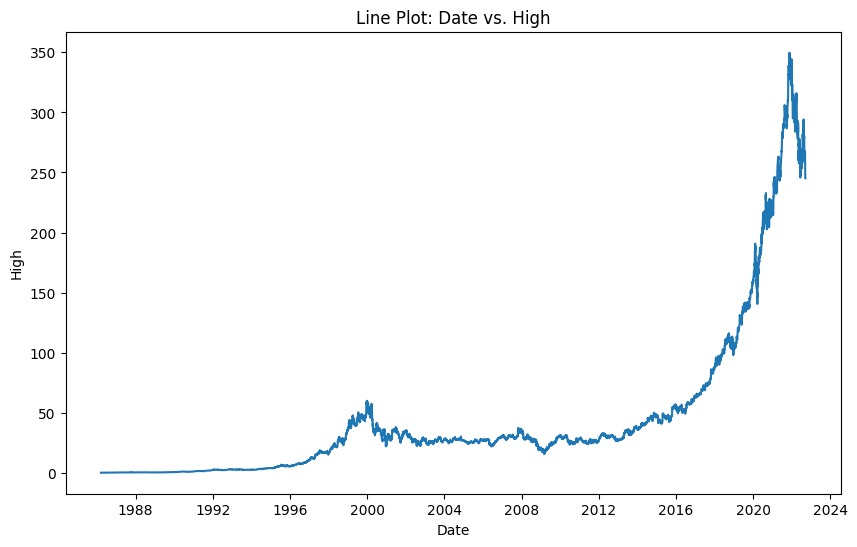

In [16]:
# Line plot of date vs. high
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['High'])
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Line Plot: Date vs. High')
plt.show()


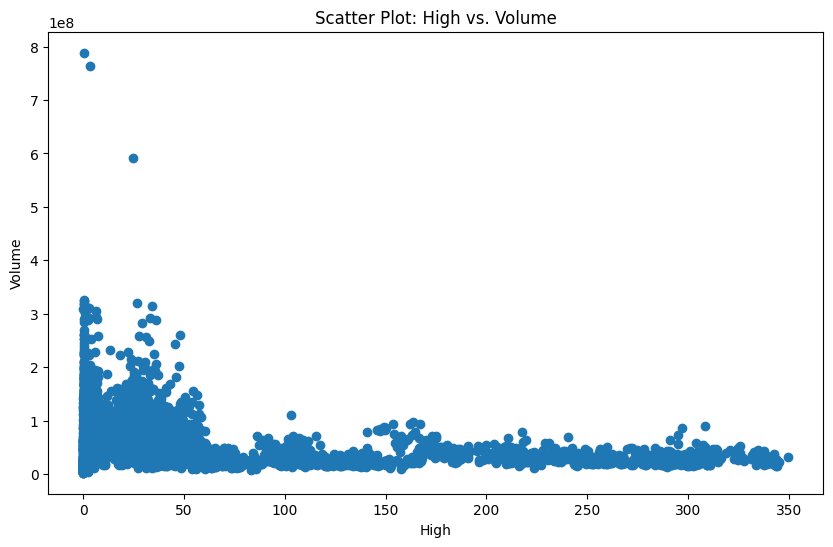

In [17]:
# Scatter plot of high vs. volume
plt.figure(figsize=(10, 6))
plt.scatter(data['High'], data['Volume'])
plt.xlabel('High')
plt.ylabel('Volume')
plt.title('Scatter Plot: High vs. Volume')
plt.show()

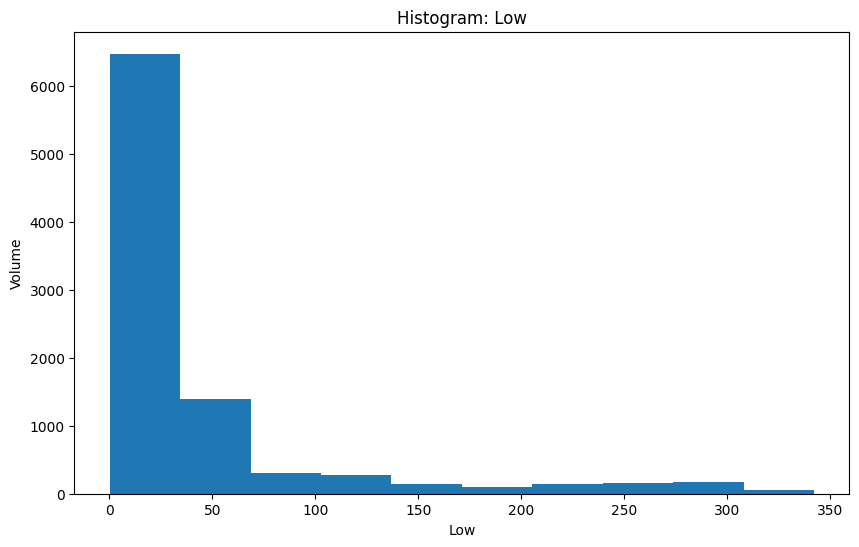

In [18]:
# Histogram of low 
plt.figure(figsize=(10, 6))
plt.hist(data['Low'], bins=10)
plt.xlabel('Low')
plt.ylabel('Volume')
plt.title('Histogram: Low')
plt.show()

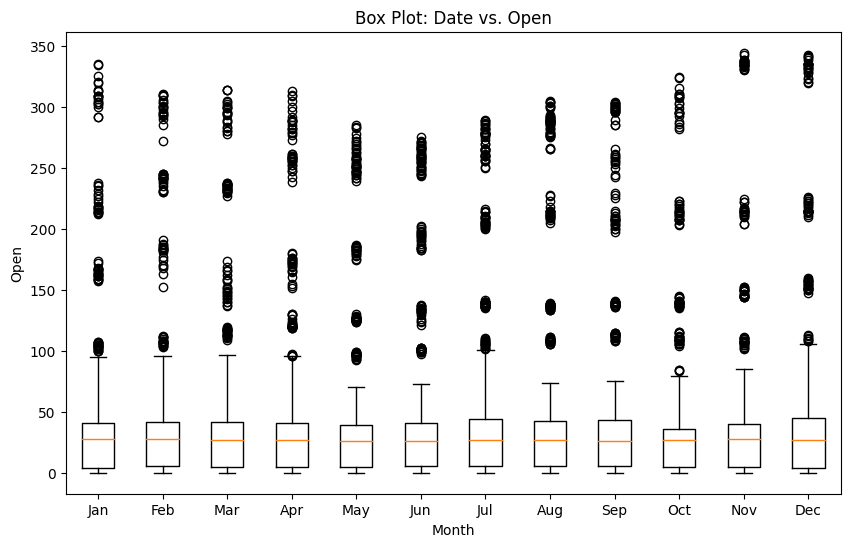

In [21]:
# Box plot of date vs. open
plt.figure(figsize=(10, 6))
plt.boxplot(data.groupby('Month')['Open'].apply(list))
plt.xlabel('Month')
plt.ylabel('Open')
plt.title('Box Plot: Date vs. Open')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [22]:
import seaborn as sns

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.703340  0.703016  0.703863  0.703413   0.686368   
Open       0.703340  1.000000  0.999936  0.999922  0.999845   0.997885   
High       0.703016  0.999936  1.000000  0.999895  0.999917   0.997907   
Low        0.703863  0.999922  0.999895  1.000000  0.999926   0.998004   
Close      0.703413  0.999845  0.999917  0.999926  1.000000   0.998035   
Adj Close  0.686368  0.997885  0.997907  0.998004  0.998035   1.000000   
Volume    -0.358556 -0.321557 -0.320063 -0.323293 -0.321786  -0.323529   
Month     -0.000251  0.001153  0.000636  0.001828  0.001282   0.001195   

             Volume     Month  
Date      -0.358556 -0.000251  
Open      -0.321557  0.001153  
High      -0.320063  0.000636  
Low       -0.323293  0.001828  
Close     -0.321786  0.001282  
Adj Close -0.323529  0.001195  
Volume     1.000000 -0.070364  
Month     -0.070364  1.000000  


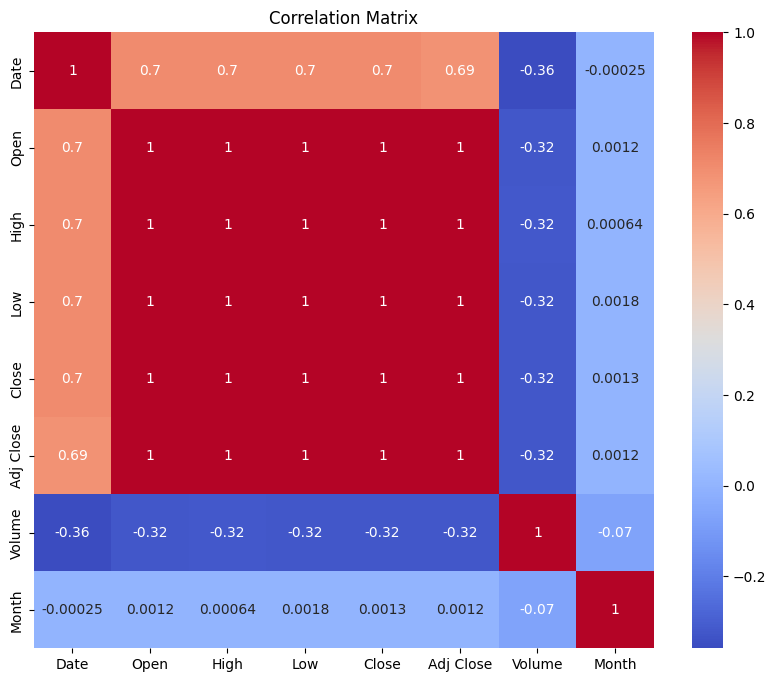

In [23]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
# Select the columns for correlation matrix
columns = ["High", "Volume", "Low", "Open"]

# Calculate the correlation matrix
cor_matrix = data[columns].corr()

# Print the correlation matrix
print(cor_matrix)

            High    Volume       Low      Open
High    1.000000 -0.320063  0.999895  0.999936
Volume -0.320063  1.000000 -0.323293 -0.321557
Low     0.999895 -0.323293  1.000000  0.999922
Open    0.999936 -0.321557  0.999922  1.000000


In [25]:
# Convert correlation matrix to long format
cor_data = cor_matrix.unstack().reset_index()
cor_data.columns = ["Variable 1", "Variable 2", "Correlation"]
# Print the long format correlation data
print(cor_data)

   Variable 1 Variable 2  Correlation
0        High       High     1.000000
1        High     Volume    -0.320063
2        High        Low     0.999895
3        High       Open     0.999936
4      Volume       High    -0.320063
5      Volume     Volume     1.000000
6      Volume        Low    -0.323293
7      Volume       Open    -0.321557
8         Low       High     0.999895
9         Low     Volume    -0.323293
10        Low        Low     1.000000
11        Low       Open     0.999922
12       Open       High     0.999936
13       Open     Volume    -0.321557
14       Open        Low     0.999922
15       Open       Open     1.000000


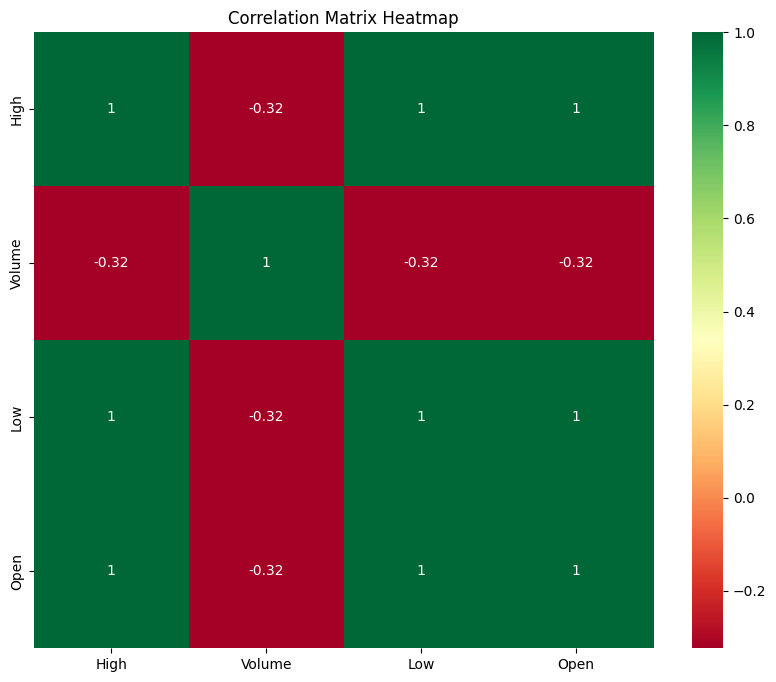

In [26]:
# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix Heatmap')
plt.show()

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063158  308160000   
1 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064247  133171200   
2 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.062613   67766400   
3 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061524   47894400   
4 1986-03-20  0.098090  0.098090  0.094618  0.095486   0.059891   58435200   

   Month  
0      3  
1      3  
2      3  
3      3  
4      3  
                                Date         Open         High          Low  \
count                           9204  9204.000000  9204.000000  9204.000000   
mean   2004-06-09 07:55:18.383311616    44.384502    44.857002    43.894897   
min              1986-03-14 00:00:00     0.090278     0.092014     0.089410   
25%              1995-04-19 18:00:00     4.767578     4.835938     4.712891   
50%              2004-06-08 12:00:00    26.937500    27.200001    26.6

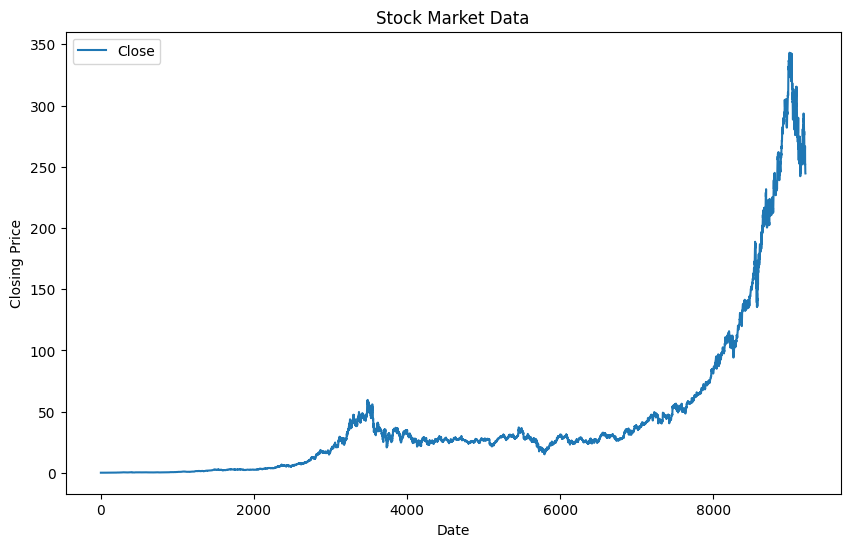

In [27]:
# View the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Plot the time series data
data.plot(y='Close', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Market Data')
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preprocess the data (if required)
# For example, convert the date column to datetime type

# Split the data into features and target variable
X = data.drop(columns=["Close"])  # Features
y = data["Close"]  # Target variable


# Handle any missing values in the dataset:
data.dropna(inplace=True)

#Separate the features and target variable:
X = data.drop(columns=['Close'])
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>)

In [ ]:
data

In [ ]:
#Arima model to predict variation in the predicted values vs actual values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#Convert the date column to datetime type and set it as the index:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#Extract the column containing the data for analysis (e.g., 'Close' column):
series = data['Close']

#Split the data into train and test sets:
train_size = int(len(series) * 0.8)
train_data, test_data = series[:train_size], series[train_size:]

#Fit the ARIMA model to the training data:
model = ARIMA(train_data, order=(1, 1, 1))  # Adjust the order parameters as per your data
model_fit = model.fit()

#Generate predictions on the test data:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

#Evaluate the performance of the model:
mse = np.mean((predictions - test_data) ** 2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

#Visualize the actual and predicted values:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded your data into the 'data' DataFrame and 'Date' is used as the index.
# No need to convert the 'Date' column to datetime or set it as the index.

# Extract the column containing the data for analysis (e.g., 'Close' column):
series = data['Close']

# Split the data into train and test sets:
train_size = int(len(series) * 0.8)
train_data, test_data = series[:train_size], series[train_size:]

# Fit the ARIMA model to the training data:
model = ARIMA(train_data, order=(1, 1, 1))  # Adjust the order parameters as per your data
model_fit = model.fit()

# Generate predictions on the test data:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Evaluate the performance of the model:
mse = np.mean((predictions - test_data) ** 2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the actual and predicted values:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Prepare the data for the seasonal ARIMA model:
# Extract the closing prices
y = data['Close']

# Split the data into train and test sets
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

#Fit the seasonal ARIMA model:
# Define the SARIMA model
order = (1, 0, 1)  # (p, d, q)
seasonal_order = (0, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)

# Fit the model to the training data
model_fit = model.fit()

#Generate predictions:
# Generate predictions for the test data
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

#Evaluate the model:
# Plot the actual and predicted values
plt.plot(y.index[train_size:], test, label='Actual')
plt.plot(y.index[train_size:], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Seasonal ARIMA - Actual vs. Predicted')
plt.legend()
plt.show()


In [ ]:
#Linear Regression model to predict

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded your data into the 'data' DataFrame
features = ["Open", "High", "Low"]
target = "Close"

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
